In [54]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy.stats import ttest_rel
import scipy.stats as stats



plt.rcParams['font.family'] = 'Calibri'
plt.rcParams['axes.titleweight'] = 'bold'

In [55]:
df_clinical = pd.read_csv('data/ab_clinical_data.csv')
df_clinical.replace('-', 0, inplace=True)

In [56]:
viridis_hex = [
    '#440154',
    '#3b528b',
    '#21918c',
    '#5ec962',
    '#fde725',
    '#287d8e'
]

output_dir = 'plots/clinical_data'

In [57]:
grouped = df_clinical.groupby(['Antibody', 'Checkpoint']).agg({
    'Composite_score': 'mean',
    'Participants': 'sum'
}).reset_index()

grouped

,Antibody,Checkpoint,Composite_score,Participants
0,ATEZOLIZUMAB,PD-L1,0.846522,1278
1,AVELUMAB,PD-L1,0.440370,1657
2,CEMIPLIMAB,PD-1,0.386985,304
3,DOSTARLIMAB,PD-1,0.002428,49
4,DURVALUMAB,PD-L1,1.510848,641
5,IPILIMUMAB,CTLA-4,0.534807,521
6,NIVOLUMAB,PD-1,0.762266,792
7,PEMBROLIZUMAB,PD-1,0.960211,845
8,TERMELIMUMAB,CTLA-4,0.119496,1114
9,TISLELIZUMAB,PD-1,1.012841,450


/var/folders/vf/ygq5vvrx3fbcsv9n_5277nmr0000gn/T/ipykernel_42379/1016207017.py:1: UserWarning: The palette list has more values (6) than needed (3), which may not be intended.
  sns.barplot(data=grouped.sort_values('Composite_score', ascending=False),
findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.
findfont: Font fa

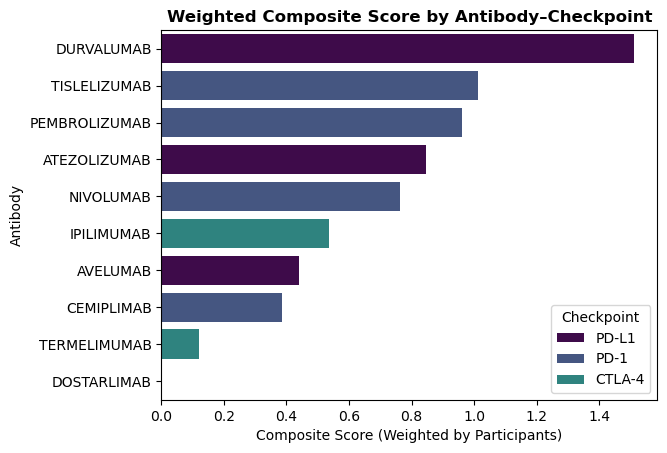

In [58]:
sns.barplot(data=grouped.sort_values('Composite_score', ascending=False),
            x='Composite_score', y='Antibody', hue='Checkpoint', palette=viridis_hex)
plt.title('Weighted Composite Score by Antibody–Checkpoint')
plt.xlabel('Composite Score (Weighted by Participants)')
plt.savefig(f'{output_dir}/weighted_composite_scire_by_ab_ckpt.pdf', bbox_inches = 'tight', dpi = 300)
plt.show()

/var/folders/vf/ygq5vvrx3fbcsv9n_5277nmr0000gn/T/ipykernel_42379/3178150706.py:18: UserWarning: The palette list has more values (6) than needed (3), which may not be intended.
  sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='Checkpoint', palette=viridis_hex, s=100)
findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not foun

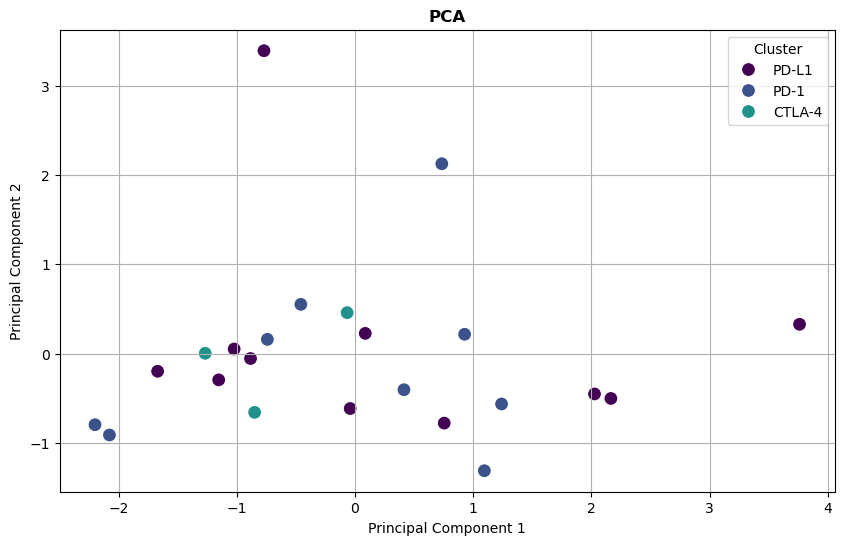

In [59]:
features = df_clinical[['OS', 'PFS', 'ORR', 'Participants']].dropna()
scaled = StandardScaler().fit_transform(features)


# Reduce to 2D
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled)

# Add PCA coordinates and cluster labels to a new DataFrame
df_pca = pd.DataFrame(pca_result, columns=['PC1', 'PC2'])
df_pca['Composite_score'] = df_clinical.loc[features.index, 'Composite_score'].values 
df_pca['Antibody'] = df_clinical.loc[features.index, 'Antibody'].values  # optional for labeling

df_pca['Checkpoint'] = df_clinical.loc[features.index, 'Checkpoint'].values  # optional for labeling

# Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='Checkpoint', palette=viridis_hex, s=100)
plt.title('PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.savefig(f'{output_dir}/pca_ckpt.pdf', bbox_inches = 'tight', dpi = 300)
plt.show()

In [60]:
top = grouped.sort_values('Composite_score', ascending=False).head(5)
bottom = grouped.sort_values('Composite_score').head(5)

print("Top performers:\n", top)
print("\nWorst performers:\n", bottom)

Top performers:
         Antibody Checkpoint  Composite_score  Participants
4     DURVALUMAB      PD-L1         1.510848           641
9   TISLELIZUMAB       PD-1         1.012841           450
7  PEMBROLIZUMAB       PD-1         0.960211           845
0   ATEZOLIZUMAB      PD-L1         0.846522          1278
6      NIVOLUMAB       PD-1         0.762266           792

Worst performers:
        Antibody Checkpoint  Composite_score  Participants
3   DOSTARLIMAB       PD-1         0.002428            49
8  TERMELIMUMAB     CTLA-4         0.119496          1114
2    CEMIPLIMAB       PD-1         0.386985           304
1      AVELUMAB      PD-L1         0.440370          1657
5    IPILIMUMAB     CTLA-4         0.534807           521


In [61]:
binding_data = pd.read_csv('data/structural_analysis/Paratope/paratope_hbonds_salt_bridges_summary.csv')

In [62]:
# Filter out necessary columns
# Define datasets for individual inhibitory checkpoints
data = pd.read_csv('data/ab_ag.tsv', sep='\t')
pd1 = data[data['compound'].str.contains('PD-1', na=False)]
pdl1 = data[data['compound'].str.contains('PD-L1', na=False)]
ctla4 = data[data['compound'].str.contains('CTLA-4', na=False)]
kir = data[data['compound'].str.contains('KIR', na=False)]
lag3 = data[data['compound'].str.contains('LAG', na=False)]
tim3 = data[data['compound'].str.contains('TIM3', na=False)]


pd1 = pd1[['pdb', 'Hchain', 'Lchain', 'antigen_chain', 'antigen_type', 'antigen_name', 'compound', 'resolution', 'method']]
pdl1 = pdl1[['pdb', 'Hchain', 'Lchain', 'antigen_chain', 'antigen_type', 'antigen_name', 'compound', 'resolution', 'method']]
ctla4 = ctla4[['pdb', 'Hchain', 'Lchain', 'antigen_chain', 'antigen_type', 'antigen_name', 'compound', 'resolution', 'method']]
kir = kir[['pdb', 'Hchain', 'Lchain', 'antigen_chain', 'antigen_type', 'antigen_name', 'compound', 'resolution', 'method']]
lag3 = lag3[['pdb', 'Hchain', 'Lchain', 'antigen_chain', 'antigen_type', 'antigen_name', 'compound', 'resolution', 'method']]
tim3 = tim3[['pdb', 'Hchain', 'Lchain', 'antigen_chain', 'antigen_type', 'antigen_name', 'compound', 'resolution', 'method']]


combined_dataset = [pdl1, pd1, ctla4, kir, lag3, tim3]

# Shuffle the list randomly
random.shuffle(combined_dataset)

# Concatenate them in the new random order
merged_df = pd.concat(combined_dataset, ignore_index=True)
shuffled_df = merged_df.sample(frac=1).reset_index(drop=True)

shuffled_df = shuffled_df[shuffled_df['resolution'] < 3.5]
shuffled_df = shuffled_df.dropna()

# 1. Filter all relevant rows: those with 'mab' OR 'M6903'
ab_mask = shuffled_df['compound'].str.contains('mab|M6903', na=False, case=False)
shuffled_df_ab = shuffled_df[ab_mask]

# 2. Extract antibody names
shuffled_df_ab['antibody'] = shuffled_df_ab['compound'].str.extract(r'\b(\w*mab)\b', expand=False)

# 3. Fill in M6903 manually where missing
m6903_mask = shuffled_df_ab['compound'].str.contains('M6903', na=False)
shuffled_df_ab.loc[m6903_mask, 'antibody'] = shuffled_df_ab.loc[m6903_mask, 'antibody'].fillna('M6903')

# # 4. Extract checkpoint names
checkpoints_pattern = r'\b(PD-1|PD-L1|CTLA-4|KIR2DL3|TIM3)\b'
shuffled_df_ab['checkpoint'] = shuffled_df_ab['compound'].str.extract(checkpoints_pattern, expand=False)

# # 5. Final formatting
shuffled_df_ab['antibody'] = shuffled_df_ab['antibody'].str.upper()

/var/folders/vf/ygq5vvrx3fbcsv9n_5277nmr0000gn/T/ipykernel_42379/2430222038.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shuffled_df_ab['antibody'] = shuffled_df_ab['compound'].str.extract(r'\b(\w*mab)\b', expand=False)
/var/folders/vf/ygq5vvrx3fbcsv9n_5277nmr0000gn/T/ipykernel_42379/2430222038.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shuffled_df_ab['checkpoint'] = shuffled_df_ab['compound'].str.extract(checkpoints_pattern, expand=False)
/var/folders/vf/ygq5vvrx3fbcsv9n_5277nmr0000gn/T/i

In [63]:
# Filter and concatenate the best performers into one clean DataFrame
best_ab_names = ['DURVALUMAB', 'TISLELIZUMAB', 'PEMBROLIZUMAB', 'ATEZOLIZUMAB', 'NIVOLUMAB']

best_performers = pd.concat([
    shuffled_df_ab[shuffled_df_ab['antibody'] == ab]
    for ab in best_ab_names
], ignore_index=True)

In [64]:
# Filter and concatenate the worst performers into one clean DataFrame
worst_ab_names = ['DOSTARLIMAB', 'TREMELIMUMAB', 'CEMIPLIMAB', 'AVELUMAB', 'IPILIMUMAB']

worst_performers = pd.concat([
    shuffled_df_ab[shuffled_df_ab['antibody'] == ab]
    for ab in worst_ab_names
], ignore_index=True)

/var/folders/vf/ygq5vvrx3fbcsv9n_5277nmr0000gn/T/ipykernel_42379/4180146480.py:13: UserWarning: The palette list has more values (6) than needed (5), which may not be intended.
  sns.barplot(data=merged_binding,


<Axes: xlabel='pdb_id', ylabel='buried_paratope_area'>

findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.
findfont: F

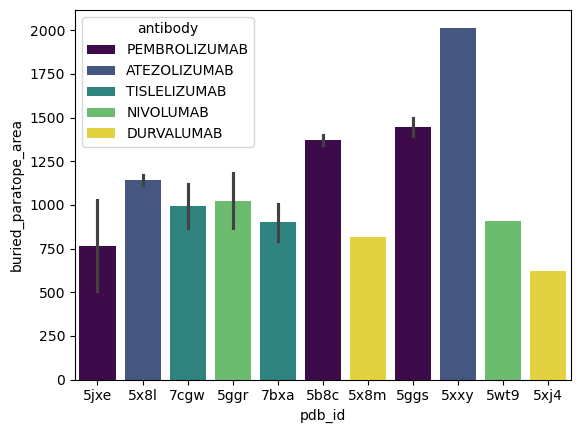

In [65]:
best_binding_data = binding_data[binding_data['pdb_id'].isin(best_performers['pdb'].unique())]

# Merge on pdb ID
merged_binding = best_binding_data.merge(
    best_performers[['pdb', 'antibody']],
    how='left',
    left_on='pdb_id',
    right_on='pdb'
)

merged_binding.drop_duplicates()

sns.barplot(data=merged_binding,
            x='pdb_id', y='buried_paratope_area', hue='antibody', palette=viridis_hex)

/var/folders/vf/ygq5vvrx3fbcsv9n_5277nmr0000gn/T/ipykernel_42379/1875519266.py:15: UserWarning: The palette list has more values (6) than needed (5), which may not be intended.
  sns.barplot(data=merged_binding,
findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.
findfont: Font

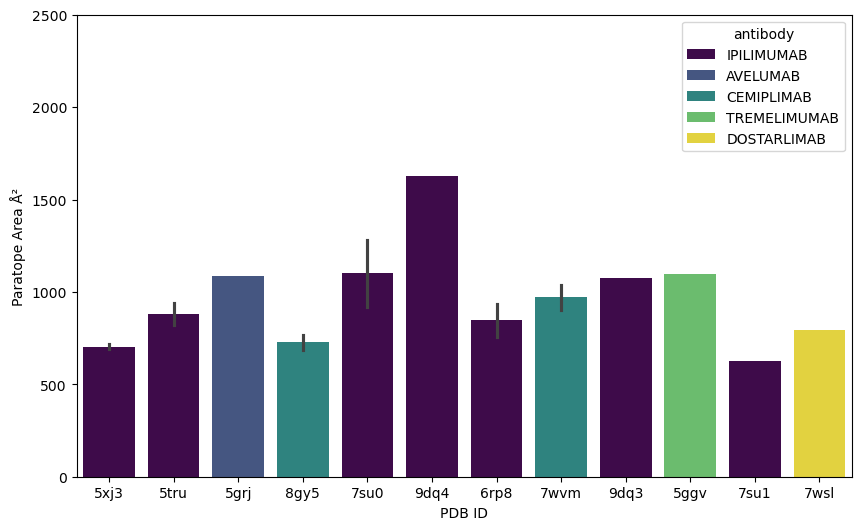

In [66]:
worst_binding_data = binding_data[binding_data['pdb_id'].isin(worst_performers['pdb'].unique())]

# Merge on pdb ID
merged_binding = worst_binding_data.merge(
    worst_performers[['pdb', 'antibody']],
    how='left',
    left_on='pdb_id',
    right_on='pdb'
)

merged_binding.drop_duplicates()

plt.figure(figsize=(10, 6))

sns.barplot(data=merged_binding,
            x='pdb_id', y='buried_paratope_area', hue='antibody', palette=viridis_hex)

plt.ylabel('Paratope Area Å²')
plt.xlabel('PDB ID')
plt.ylim(top = 2500)

plt.savefig(f'{output_dir}/paratope_area_per_ab.pdf', bbox_inches = 'tight', dpi = 300)

/var/folders/vf/ygq5vvrx3fbcsv9n_5277nmr0000gn/T/ipykernel_42379/1090762339.py:29: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.barplot(data=merged_all,
findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.
findfont: Font fam

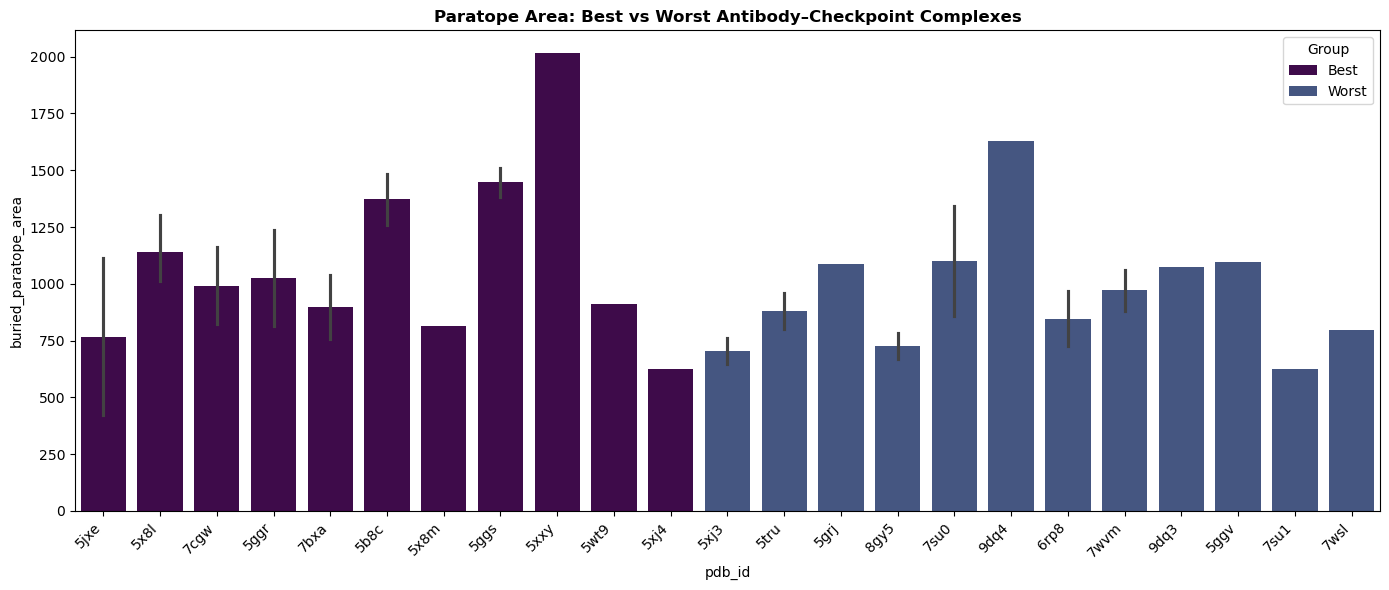

In [67]:
# BEST
best_binding_data = binding_data[binding_data['pdb_id'].isin(best_performers['pdb'].unique())]
merged_best = best_binding_data.merge(
    best_performers[['pdb', 'antibody']],
    how='left',
    left_on='pdb_id',
    right_on='pdb'
)
merged_best['Group'] = 'Best'

# WORST
worst_binding_data = binding_data[binding_data['pdb_id'].isin(worst_performers['pdb'].unique())]
merged_worst = worst_binding_data.merge(
    worst_performers[['pdb', 'antibody']],
    how='left',
    left_on='pdb_id',
    right_on='pdb'
)
merged_worst['Group'] = 'Worst'

# Combine both
merged_all = pd.concat([merged_best, merged_worst], ignore_index=True)

# Optional: clean duplicates
merged_all = merged_all.drop_duplicates(subset=['pdb_id', 'buried_paratope_area'])

# Barplot — grouped by Group (best/worst)
plt.figure(figsize=(14, 6))
sns.barplot(data=merged_all,
            x='pdb_id', y='buried_paratope_area', hue='Group', palette=viridis_hex)

plt.xticks(rotation=45, ha='right')
plt.title('Paratope Area: Best vs Worst Antibody–Checkpoint Complexes')
plt.tight_layout()
plt.show()

/var/folders/vf/ygq5vvrx3fbcsv9n_5277nmr0000gn/T/ipykernel_42379/2214235518.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=merged_all, x='Group', y='num_filtered_hbonds', palette=viridis_hex)
/var/folders/vf/ygq5vvrx3fbcsv9n_5277nmr0000gn/T/ipykernel_42379/2214235518.py:8: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.boxplot(data=merged_all, x='Group', y='num_filtered_hbonds', palette=viridis_hex)
findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not fou

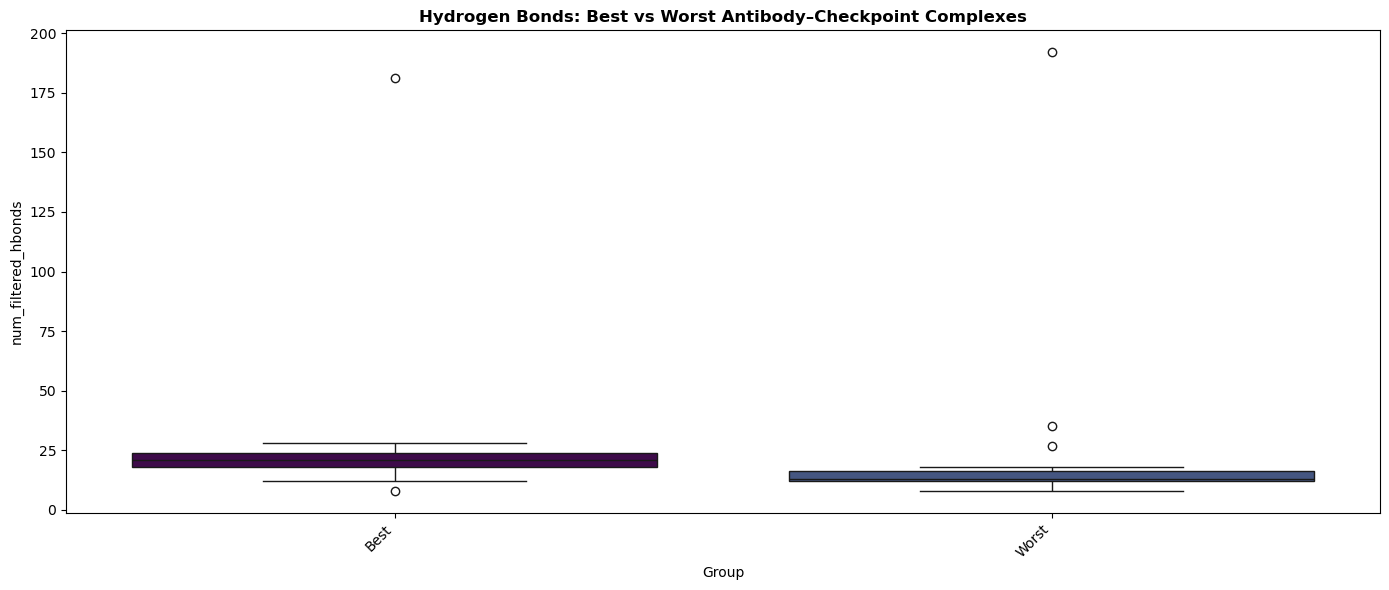

In [68]:
# Optional: clean duplicates
merged_all = merged_all.drop_duplicates(subset=['pdb_id', 'num_filtered_hbonds'])

# Barplot — grouped by Group (best/worst)
plt.figure(figsize=(14, 6))
#sns.barplot(data=merged_all,
           # x='pdb_id', y='num_filtered_hbonds', hue='Group', palette=viridis_hex)
sns.boxplot(data=merged_all, x='Group', y='num_filtered_hbonds', palette=viridis_hex)

plt.xticks(rotation=45, ha='right')
plt.title('Hydrogen Bonds: Best vs Worst Antibody–Checkpoint Complexes')
plt.tight_layout()
plt.show()

/var/folders/vf/ygq5vvrx3fbcsv9n_5277nmr0000gn/T/ipykernel_42379/1798295662.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=merged_all, x='Group', y='num_salt_bridges', palette=viridis_hex)
/var/folders/vf/ygq5vvrx3fbcsv9n_5277nmr0000gn/T/ipykernel_42379/1798295662.py:6: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.boxplot(data=merged_all, x='Group', y='num_salt_bridges', palette=viridis_hex)
findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.
fi

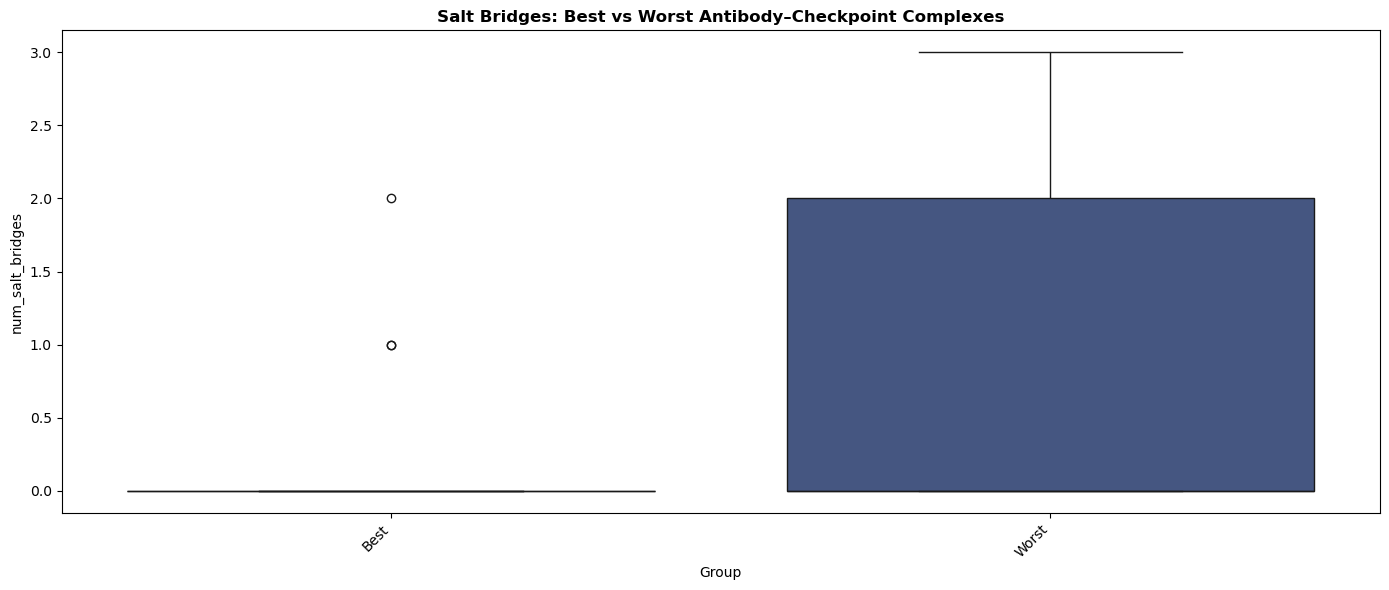

In [69]:
# Optional: clean duplicates
merged_all = merged_all.drop_duplicates(subset=['pdb_id', 'num_salt_bridges'])

# Barplot — grouped by Group (best/worst)
plt.figure(figsize=(14, 6))
sns.boxplot(data=merged_all, x='Group', y='num_salt_bridges', palette=viridis_hex)


plt.xticks(rotation=45, ha='right')
plt.title('Salt Bridges: Best vs Worst Antibody–Checkpoint Complexes')
plt.tight_layout()
# plt.savefig(f'{output_dir}/best_worst_comp_salt_bridges.pdf', bbox_inches = 'tight', dpi = 300)

# # ax = plt.gca()  # get current axes

# # # Set all text and spines to white
# # ax.set_title('Salt Bridges: Best vs Worst Antibody–Checkpoint Complexes', fontsize=14, color='white')
# # ax.set_xlabel("PDB ID", color='white')
# # ax.set_ylabel("Number of Salt Bridges", color='white')
# # ax.tick_params(axis='x', colors='white', rotation=45)
# # ax.tick_params(axis='y', colors='white')

# # # White border around heatmap
# # for spine in ax.spines.values():
# #     spine.set_edgecolor('white')

# # # Set annotation text color inside the heatmap
# # for text in ax.texts:
# #     text.set_color('white')

# plt.savefig(
#    f'{output_dir}/best_worst_comp_salt_bridges.png',
#     dpi=300,
#     bbox_inches='tight',
#     transparent=True
# )


plt.show()

In [70]:
# Subset the groups
best = merged_all[merged_all['Group'] == 'Best']['num_salt_bridges']
worst = merged_all[merged_all['Group'] == 'Worst']['num_salt_bridges']

# Check normality (optional)
_, p_best = stats.shapiro(best)
_, p_worst = stats.shapiro(worst)

if p_best > 0.05 and p_worst > 0.05:
    # Both are normally distributed — use t-test
    stat, p_value = stats.ttest_ind(best, worst, equal_var=False)
    print(f"T-test: p = {p_value:.4f}")
else:
    # Not normal — use Mann-Whitney U test
    stat, p_value = stats.mannwhitneyu(best, worst, alternative='less')
    print(f"Mann-Whitney U test: p = {p_value:.4f}")


Mann-Whitney U test: p = 0.1495


In [71]:
epitope_data = pd.read_csv('data/structural_analysis/Paratope/paratope_hbonds_salt_bridges_summary.csv')

In [72]:
section = 'paratope'
files = [
    f'data/ctla4/ctla4_{section}_residue_frequencies_pivot.csv',
    f'data/kir/kir_{section}_residue_frequencies_pivot.csv',
    f'data/pdl1/pdl1_{section}_residue_frequencies_pivot.csv',
    f'data/pd1/pd1_{section}_residue_frequencies_pivot.csv',
    f'data/tim3/tim3_{section}_residue_frequencies_pivot.csv',
    f'data/lag3/lag3_{section}_residue_frequencies_pivot.csv'
]

# Read all CSVs into a list of DataFrames
dfs = [pd.read_csv(f) for f in files]

# Concatenate them
residue_df = pd.concat(dfs, ignore_index=True)


# Reshape: from wide to long format
residue_long = residue_df.melt(
    id_vars='residue_name',
    var_name='pdb_id',
    value_name='count'
)

# Remove the 'mean' row if needed
residue_long = residue_long[residue_long['pdb_id'] != 'mean']

In [73]:
pdb_map = merged_all[['pdb_id', 'antibody', 'Group']].drop_duplicates()
residue_long_with_ab = residue_long.merge(
    pdb_map,
    how='left',
    on='pdb_id'
)

# Drop rows where 'antibody' is missing
residue_long_with_ab = residue_long_with_ab.dropna(subset=['antibody'])

# Optional: then drop duplicates if needed
residue_long_with_ab = residue_long_with_ab.drop_duplicates()

In [79]:
# Calculate sequence length per antibody
# seq_lengths = residue_long_with_ab.groupby('antibody').size()

# Step 2: Pivot table of raw counts
heatmap_data = residue_long_with_ab.pivot_table(
    index='residue_name',
    columns='antibody',
    values='count',
    aggfunc='sum',
    fill_value=0
)

seq_lengths = epitope_data.loc[heatmap_data.index, "paratope_sequence_x"].str.len()
heatmap_data_normalized = heatmap_data.divide(seq_lengths, axis=0)


# Step 3: Normalize by sequence length (divide each column by its respective sequence length)
# heatmap_data_normalized = heatmap_data.divide(seq_lengths, axis=0)

# Define the full order: best first, then worst, then any remaining antibodies
all_columns = list(heatmap_data_normalized.columns)
remaining_columns = [col for col in all_columns if col not in best_ab_names + worst_ab_names]
sorted_columns = best_ab_names + worst_ab_names + remaining_columns

# Reorder the DataFrame columns
heatmap_sorted = heatmap_data_normalized[sorted_columns]

# Plot
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_sorted, cmap='viridis', annot=True, fmt='.2f', vmax=0.3)

plt.title(f'Normalized {section.capitalize()} Residue Usage per Antibody')
plt.ylabel('Residue Type')
plt.xlabel('Antibody')
plt.tight_layout()
plt.savefig(f'{output_dir}/normalized_{section}_residue_usage_per_ab.pdf', bbox_inches = 'tight', dpi = 300)

plt.savefig(
    f'{output_dir}/normalized_{section}_residue_usage_per_ab.png',
    dpi=300,
    bbox_inches='tight',
    transparent=True
)


plt.show()

KeyError: "None of [Index(['ALA', 'ARG', 'ASN', 'ASP', 'EDO', 'FLC', 'GLN', 'GLU', 'GLY', 'HIS',\n       'ILE', 'LEU', 'LYS', 'MET', 'PHE', 'PRO', 'SER', 'THR', 'TRP', 'TYR',\n       'VAL'],\n      dtype='object', name='residue_name')] are in the [index]"

In [78]:
epitope_data

,pdb_id,H_chain,L_chain,antigen_chain,buried_paratope_area,num_filtered_hbonds,num_salt_bridges,folder,paratope_sequence_x,structure_id_y,paratope_sequence_y,structure_id,binding_score
0,5xj3,D,E,F,754.822449,17,0,ctla4,YNYSW,5xj3_ID_4,QYYGSSW,5xj3_ID_1,0.073501
1,5xj3,D,E,F,754.822449,17,0,ctla4,YNYGSW,5xj3_ID_4,QYYGSSW,5xj3_ID_2,0.073501
2,5xj3,D,E,F,754.822449,17,0,ctla4,YNYGSSW,5xj3_ID_4,QYYGSSW,5xj3_ID_3,0.073501
3,5xj3,D,E,F,754.822449,17,0,ctla4,QYYGSSW,5xj3_ID_4,QYYGSSW,5xj3_ID_4,0.073501
4,5jxe,G,F,A,1112.598145,18,0,pd1,YRY,5jxe_ID_2,SYISGNRRYR,5jxe_ID_1,0.120477
...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,5x8l,F,K,A,1111.904175,17,0,pdl1,WWSYGSYW,5x8l_ID_5,DWSYGSYYW,5x8l_ID_21,0.135876
126,5x8l,F,K,A,1111.904175,17,0,pdl1,SSDWSYSTYYRWP,5x8l_ID_5,DWSYGSYYW,5x8l_ID_22,0.135876
127,5x8l,F,K,A,1111.904175,17,0,pdl1,SDWSYGSYRW,5x8l_ID_5,DWSYGSYYW,5x8l_ID_23,0.135876
128,5x8l,F,K,A,1111.904175,17,0,pdl1,SDWSYGSTYWP,5x8l_ID_5,DWSYGSYYW,5x8l_ID_24,0.135876


In [84]:
import pandas as pd

# Step 1: Load epitope_data (already loaded in your case)
# epitope_data = pd.read_csv("your_epitope_data.csv")  # Only if not loaded yet

# Step 2: Create heatmap of residue frequencies per antibody
heatmap_data = residue_long_with_ab.pivot_table(
    index='residue_name',
    columns='antibody',
    aggfunc='size',
    fill_value=0
)


# Step 3: Create a dictionary of sequence lengths per antibody
antibody_lengths = (
    epitope_data
    .drop_duplicates(subset="pdb_id")
    .set_index("pdb_id")["paratope_sequence_x"]  # or _y depending on your final column
    .str.len()
    .to_dict()
)

# Step 4: Reindex to match heatmap columns
seq_lengths = pd.Series(antibody_lengths).reindex(heatmap_data.columns)

# Step 5: Normalize each column by its antibody sequence length
heatmap_data_normalized = heatmap_data.divide(seq_lengths, axis='columns')

# Optional: Display or save
print(heatmap_data_normalized.head())
# heatmap_data_normalized.to_csv("normalized_heatmap.csv")


antibody      ATEZOLIZUMAB  AVELUMAB  CEMIPLIMAB  DOSTARLIMAB  DURVALUMAB  \
residue_name                                                                
ALA                    NaN       NaN         NaN          NaN         NaN   
ARG                    NaN       NaN         NaN          NaN         NaN   
ASN                    NaN       NaN         NaN          NaN         NaN   
ASP                    NaN       NaN         NaN          NaN         NaN   
EDO                    NaN       NaN         NaN          NaN         NaN   

antibody      IPILIMUMAB  NIVOLUMAB  PEMBROLIZUMAB  TISLELIZUMAB  TREMELIMUMAB  
residue_name                                                                    
ALA                  NaN        NaN            NaN           NaN           NaN  
ARG                  NaN        NaN            NaN           NaN           NaN  
ASN                  NaN        NaN            NaN           NaN           NaN  
ASP                  NaN        NaN            NaN     

In [81]:
print(residue_long_with_ab["residue_name"].head())
print(residue_long_with_ab["residue_name"].apply(type).value_counts())


0    ALA
1    ARG
2    ASN
3    ASP
4    FLC
Name: residue_name, dtype: object
residue_name
<class 'str'>    892
Name: count, dtype: int64


In [ ]:
# compare normally elevetaded composition for selected antibodies (2 bad performing, 2 good performing)
best_values = heatmap_data_normalized.loc[['TYR', 'SER', 'GLY'], ['DOSTARLIMAB', 'TREMELIMUMAB']].values.flatten()
worst_values = heatmap_data_normalized.loc[['TYR', 'SER', 'GLY'], ['NIVOLUMAB', 'DURVALUMAB']].values.flatten()

In [ ]:
stat, pval = ttest_rel(best_values, worst_values)
print(f"U-statistic: {stat:.4f}")
print(f"P-value: {pval:.4e}")

U-statistic: 1.7093
P-value: 1.4809e-01


In [ ]:
from scipy.stats import pearsonr, spearmanr

pearson_r, pearson_p = pearsonr(df_merged[f"{section}_length"], df_merged["binding_score"])
spearman_r, spearman_p = spearmanr(df_merged[f"{section}_length"], df_merged["binding_score"])

print(f"Pearson r = {pearson_r:.3f}, p = {pearson_p:.3e}")
print(f"Spearman r = {spearman_r:.3f}, p = {spearman_p:.3e}")